In [5]:
import numpy as np
import torch
from scipy.io import loadmat

# DeepMoD stuff
from deepymod_torch import DeepMoD
from deepymod_torch.model.func_approx import NN
from deepymod_torch.model.library import Library1D
from deepymod_torch.model.constraint import LeastSquares
from deepymod_torch.model.sparse_estimators import  Threshold, PDEFIND


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set()

%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

In [3]:
# Prepping data
data = loadmat('kuramoto_sivishinky.mat')

t = data['tt']
x = data['x']
u = data['uu']
x_grid, t_grid = np.meshgrid(x, t, indexing='ij')

x_grid = x_grid[:, :100]
t_grid = t_grid[:, :100]
u = u[:, :100]

X = np.transpose((t_grid.flatten(), x_grid.flatten()))
y = u.reshape((u.size, 1))

noise_level = 0.0
y_noisy = y + noise_level * np.std(y) * np.random.randn(y[:,0].size, 1)
number_of_samples = 20000

idx = np.random.permutation(y.shape[0])
X = torch.tensor(X[idx, :][:number_of_samples], dtype=torch.float32)
y = torch.tensor(y_noisy[idx, :][:number_of_samples], dtype=torch.float32)

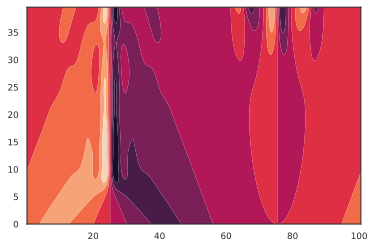

In [13]:
plt.contourf(x_grid, t_grid, u)

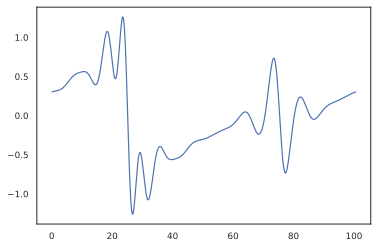

In [12]:
plt.plot(x, u[:, 80])